<a href="https://colab.research.google.com/github/dhyannn/Computer-vision/blob/main/Dhyan_cv_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

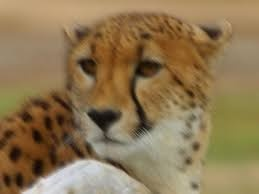

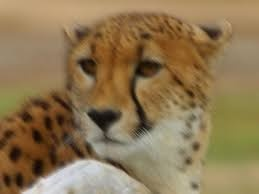

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
image = cv2.imread('/content/cat.jpg')

# Define a kernel (e.g., a Gaussian blur kernel)
kernel = np.array([[0, 0, 0],
                   [0, 1, 0],
                   [0, 0, 0]])

# Apply the filter using filter2D
filtered_image = cv2.filter2D(image, -1, kernel)

# Save
cv2.imwrite('original_image.jpg', image)
cv2.imwrite('filtered_image.jpg', filtered_image)

# Display
from IPython.display import Image, display
display(Image(filename='original_image.jpg'))
display(Image(filename='filtered_image.jpg'))


In [ ]:
import cv2
import numpy as np

# Read the input image
image = cv2.imread('/content/m4.jpeg')

# Define kernels
identity_kernel = np.array([[0, 0, 0],
                            [0, 1, 0],
                            [0, 0, 0]])

edge_detection_kernel = np.array([[-1, -1, -1],
                                  [-1,  8, -1],
                                  [-1, -1, -1]])

sharpen_kernel = np.array([[ 0, -1,  0],
                            [-1,  5, -1],
                            [ 0, -1,  0]])

box_blur_kernel = np.ones((3, 3), dtype=np.float32) / 9.0

gaussian_blur_kernel = np.array([[1,  2,  1],
                                  [2,  4,  2],
                                  [1,  2,  1]]) / 16.0

# Apply filter2D with different kernels
identity_result = cv2.filter2D(image, -1, identity_kernel)
edge_detection_result = cv2.filter2D(image, -1, edge_detection_kernel)
sharpen_result = cv2.filter2D(image, -1, sharpen_kernel)
box_blur_result = cv2.filter2D(image, -1, box_blur_kernel)
gaussian_blur_result = cv2.filter2D(image, -1, gaussian_blur_kernel)

# Display the results
cv2.imwrite('identity_result.jpeg', identity_result)
cv2.imwrite('edge_detection_result.jpeg', edge_detection_result)
cv2.imwrite('sharpen_result.jpeg', sharpen_result)
cv2.imwrite('box_blur_result.jpeg', box_blur_result)
cv2.imwrite('gaussian_blur_result.jpeg', gaussian_blur_result)


True

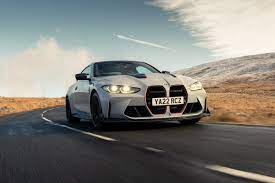

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(identity_result)

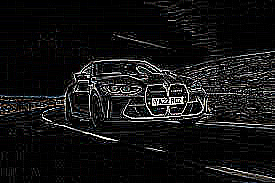

In [ ]:
cv2_imshow(edge_detection_result)

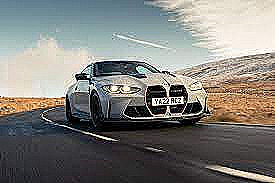

In [ ]:
cv2_imshow(sharpen_result)

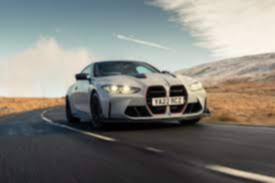

In [ ]:
cv2_imshow(gaussian_blur_result)

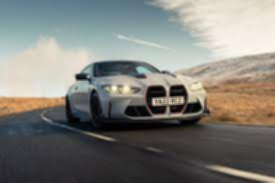

In [ ]:
cv2_imshow(box_blur_result)

Reflect:

In this mode, the input is extended by reflecting about the edge of the last pixel. If the input is [1, 2, 3, 4], the reflected padding would be [4, 3, 2, 1, 2, 3, 4]. This mode is useful for preserving image edges and is often used in filters like Sobel edge detection.

Constant:

In this mode, the input is extended by filling all values beyond the edge with a constant value specified by the constant_values parameter in np.pad(). This mode is commonly used for zero-padding (i.e., filling the extended area with zeros).

Nearest:

This mode extends the input by replicating the last pixel along the edge. For example, if the input is [1, 2, 3, 4], the extended area becomes [1, 1, 2, 3, 4, 4, 4]. It's called "nearest" because it replicates the nearest pixel values.

Mirror:

the input is extended by mirroring the pixels about the edge. If the input is [1, 2, 3, 4], the mirrored padding would be [2, 1, 2, 3, 4, 3, 2]. This mode helps to preserve local structures in the image.

Wrap:

This mode extends the input by wrapping the pixels around. It takes the values from the opposite side of the image. For example, if the input is [1, 2, 3, 4], the wrapped padding would be [4, 1, 2, 3, 4, 1, 2]. This mode is useful for creating seamless repeating patterns.

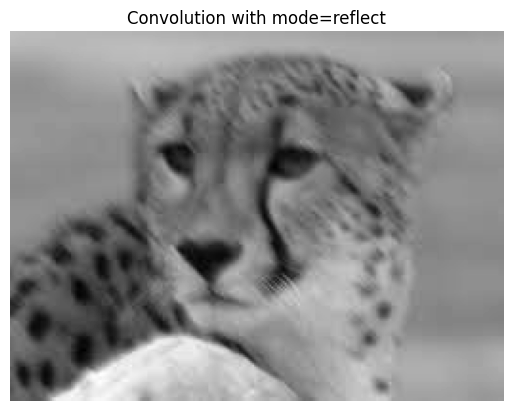

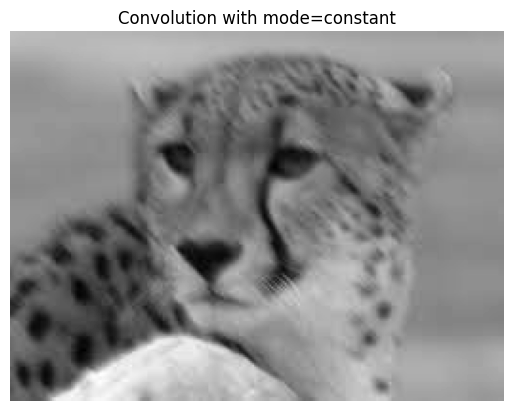

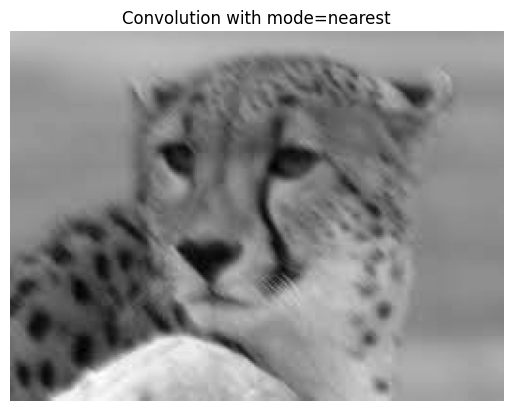

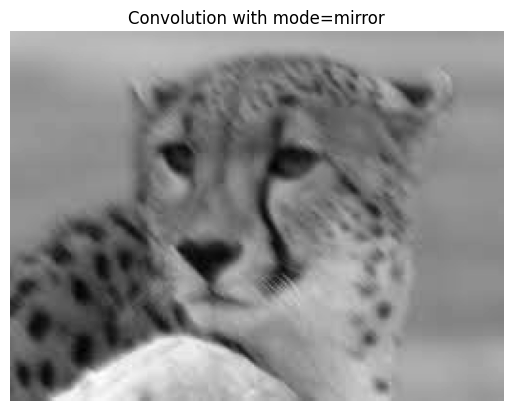

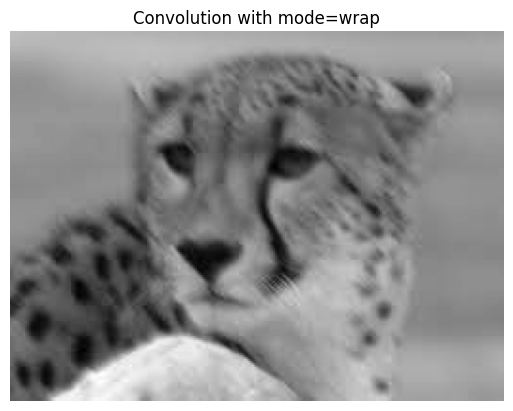

In [ ]:
import cv2
import numpy as np
from scipy.signal import convolve2d
from matplotlib import pyplot as plt

# Load the image
image = cv2.imread('/content/cat.jpg', cv2.IMREAD_GRAYSCALE)

# Define a kernel (e.g., a Gaussian blur kernel)
kernel = np.array([[0, 0, 0],
                   [0, 1, 0],
                   [0, 0, 0]])

# Apply the convolution with different boundary modes
modes = ['reflect', 'constant', 'nearest', 'mirror', 'wrap']
for mode in modes:
    # Apply padding according to the mode
    if mode == 'reflect':
        padded_image = np.pad(image, 1, mode='reflect')
    elif mode == 'constant':
        padded_image = np.pad(image, 1, mode='constant', constant_values=0)
    elif mode == 'nearest':
        padded_image = np.pad(image, 1, mode='edge')
    elif mode == 'mirror':
        padded_image = np.pad(image, 1, mode='symmetric')
    elif mode == 'wrap':
        padded_image = np.pad(image, 1, mode='wrap')

    # Perform convolution
    filtered_image = convolve2d(padded_image, kernel, mode='valid')

    # Display the filtered image
    plt.figure()
    plt.imshow(filtered_image, cmap='gray')
    plt.title(f'Convolution with mode={mode}')
    plt.axis('off')
    plt.show()


In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from scipy import ndimage
from google.colab.patches import cv2_imshow

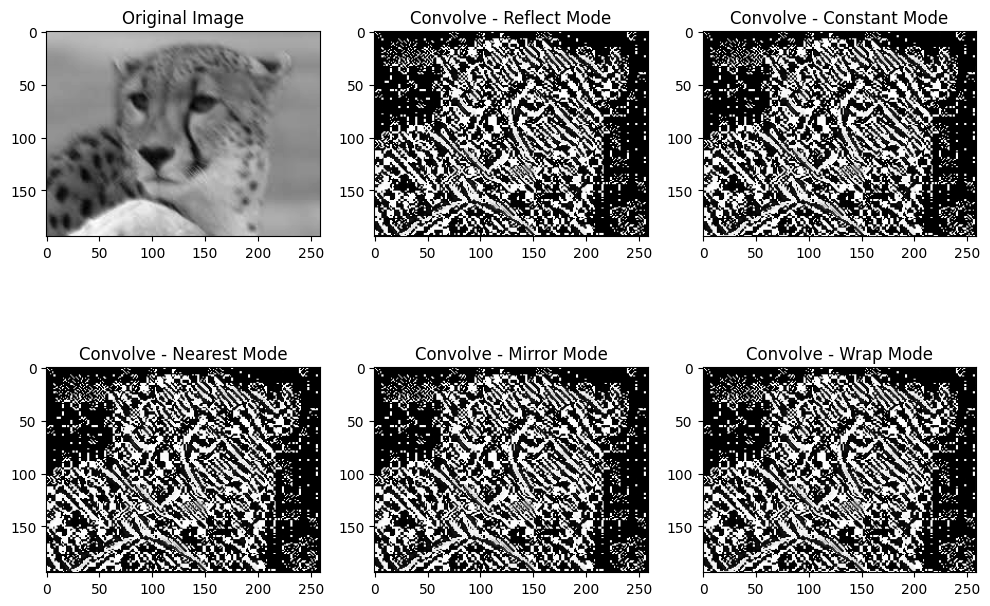

In [7]:
image = cv2.imread('/content/cat.jpg', cv2.IMREAD_GRAYSCALE)

# Define the edge detection kernel
edge_detection_kernel = np.array([[1, 0, -1],
                                 [0, 0, 0],
                                 [-1, 0, 1]])

# Apply the convolve function with different modes
convolve_reflect = ndimage.convolve(image, edge_detection_kernel, mode='reflect')
convolve_constant = ndimage.convolve(image, edge_detection_kernel, mode='constant')
convolve_nearest = ndimage.convolve(image, edge_detection_kernel, mode='nearest')
convolve_mirror = ndimage.convolve(image, edge_detection_kernel, mode='mirror')
convolve_wrap = ndimage.convolve(image, edge_detection_kernel, mode='wrap')

# Display the output images
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 3, 2)
plt.imshow(convolve_reflect, cmap='gray')
plt.title('Convolve - Reflect Mode')

plt.subplot(2, 3, 3)
plt.imshow(convolve_constant, cmap='gray')
plt.title('Convolve - Constant Mode')

plt.subplot(2, 3, 4)
plt.imshow(convolve_nearest, cmap='gray')
plt.title('Convolve - Nearest Mode')

plt.subplot(2, 3, 5)
plt.imshow(convolve_mirror, cmap='gray')
plt.title('Convolve - Mirror Mode')

plt.subplot(2, 3, 6)
plt.imshow(convolve_wrap, cmap='gray')
plt.title('Convolve - Wrap Mode')

plt.show()

